<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 00 Dataset Download and Examination


### Riccardo Spolaor (864877)

</center>

## Index

1. [Scaricare il dataset e rendere i dati facilmente accessibili](#s_1)
1. Section 2

<a id="s_1"></a>

## Scaricare il dataset e rendere i dati facilmente accessibili

Il primo step consiste nello scaricare i vari dataset, importarli in oggetti DataFrame della libreria pandas ed unirli in un solo DataFrame.

Tengo traccia dei differenti dataset scaricati assegnando ad ognuno una feature ***csvID***.

Ignoro i dati dell'anno 2000 in quanto sono privi di dati riguardo alle scommesse.

In [15]:
import urllib.request, zipfile, pandas
import numpy as np
%matplotlib inline

In [3]:
#ASSEGNO UN ID A CIASCUN DATASET DATO CHE I VALORI ATP SI RIPETONO

def get_file(url):
    filehandle, _ = urllib.request.urlretrieve(url)
    zip_file_obj = zipfile.ZipFile(filehandle, 'r')
    file = zip_file_obj.open(zip_file_obj.namelist()[0])
    return file

dataframe = pandas.DataFrame()
dataframe.insert(0, column ='csvID', value = 0)

for date in range(2001,2019+1):
    file = get_file('http://tennis-data.co.uk/' + str(date) + '/' + str(date) + '.zip')
    dataframe = dataframe.append(pandas.read_excel(file).assign(csvID = date-2001), sort = False, ignore_index = True)


dataframe.head()

,csvID,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataframe.columns.values

array(['csvID', 'ATP', 'Location', 'Tournament', 'Date', 'Series',
       'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank',
       'LRank', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5',
       'L5', 'Wsets', 'Lsets', 'Comment', 'CBW', 'CBL', 'GBW', 'GBL',
       'IWW', 'IWL', 'SBW', 'SBL', 'B365W', 'B365L', 'B&WW', 'B&WL',
       'EXW', 'EXL', 'PSW', 'PSL', 'WPts', 'LPts', 'UBW', 'UBL', 'LBW',
       'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL', 'AvgW', 'AvgL'], dtype=object)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 55 columns):
csvID         51945 non-null int64
ATP           51945 non-null float64
Location      51945 non-null object
Tournament    51945 non-null object
Date          51945 non-null datetime64[ns]
Series        51945 non-null object
Court         51945 non-null object
Surface       51945 non-null object
Round         51945 non-null object
Best of       51945 non-null float64
Winner        51945 non-null object
Loser         51945 non-null object
WRank         51926 non-null float64
LRank         51854 non-null object
W1            51675 non-null float64
L1            51677 non-null float64
W2            51173 non-null object
L2            51174 non-null object
W3            24049 non-null object
L3            24048 non-null object
W4            4729 non-null float64
L4            4729 non-null float64
W5            1795 non-null float64
L5            1795 non-null float64
Wsets         5

### Correzione dei tipi assegnati in modo scorretto
Controllo se alcune feature hanno assegnati tipi differenti da quelli attesi e correggo eventuali valori errati

In [6]:
print('Feature di tipo Object:\n', dataframe.select_dtypes(exclude= np.number).columns.tolist())

dataframe.select_dtypes(exclude= np.number).head()

Feature di tipo Object:
 ['Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Winner', 'Loser', 'LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets', 'Comment', 'EXW']


,Location,Tournament,Date,Series,Court,Surface,Round,Winner,Loser,LRank,W2,L2,W3,L3,Lsets,Comment,EXW
0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Clement A.,Gaudenzi A.,101,6,0,6,3,1,Completed,NaN
1,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Goldstein P.,Jones A.,442,6,2,NaN,NaN,0,Completed,NaN
2,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Haas T.,Smith L.,485,6,3,NaN,NaN,0,Completed,NaN
3,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Henman T.,Rusedski G.,69,7,6,NaN,NaN,0,Completed,NaN
4,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,Hewitt L.,Arthurs W.,83,6,3,NaN,NaN,0,Completed,NaN


***EXW*** presenta valori numerici, ma è categorizzato come *Object*.

Controllo quali sono i valori non numerici che non permettono il corretto casting a float e procedo alla loro correzione

In [7]:
import numbers

def checkValues(attribute_names):
    for a in attribute_names:
        print('"'+a+'": ', 'Wrong Values -> ' , set([x for x in dataframe[a] if not isinstance(x, numbers.Number)]))
    
checkValues(['LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets', 'EXW'])

"LRank":  Wrong Values ->  {'NR'}
"W2":  Wrong Values ->  {' '}
"L2":  Wrong Values ->  {' '}
"W3":  Wrong Values ->  {' '}
"L3":  Wrong Values ->  {' '}
"Lsets":  Wrong Values ->  {'`1'}
"EXW":  Wrong Values ->  {'2.,3'}


In [8]:
import re

def reassignNans(attribute_names):
    for a in attribute_names:
        wrong_values = set([x for x in dataframe[a] if not isinstance(x, numbers.Number)])
        dataframe.loc[dataframe[a].isin(wrong_values), a] = np.nan
        dataframe[a] = dataframe[a].astype(float)

def correctTypos(attribute_names):
    for a in attribute_names:
        wrong_values = set([x for x in dataframe[a] if not isinstance(x, numbers.Number)])
        indexes = dataframe[dataframe[a].isin(wrong_values)].index.values
        dataframe.iloc[indexes]
        for i in indexes:
            dataframe.iloc[i,dataframe.columns.get_loc(a)] = float(re.sub("[^0-9^.]", "", str(dataframe.iloc[i][a])))            
        dataframe[a] = dataframe[a].astype(float)

In [9]:
print('WRank, LRank, W2, L2, W3 and L3 have strings to represent NaN values.')
print('It is possible to set these strings to NaN and assign "float" as the features type :\n')

reassignNans(['WRank', 'LRank', 'W2', 'L2', 'W3', 'L3'])
checkValues(['WRank', 'LRank', 'W2', 'L2', 'W3', 'L3'])

WRank, LRank, W2, L2, W3 and L3 have strings to represent NaN values.
It is possible to set these strings to NaN and assign "float" as the features type :

"WRank":  Wrong Values ->  set()
"LRank":  Wrong Values ->  set()
"W2":  Wrong Values ->  set()
"L2":  Wrong Values ->  set()
"W3":  Wrong Values ->  set()
"L3":  Wrong Values ->  set()


In [10]:
print('EXW and Lsets have typos.')
print('It is possible to correct these typos and assign "float" as the features type :\n')

correctTypos(['EXW', 'Lsets'])
checkValues(['EXW', 'Lsets'])

EXW and Lsets have typos.
It is possible to correct these typos and assign "float" as the features type :

"EXW":  Wrong Values ->  set()
"Lsets":  Wrong Values ->  set()


In [11]:
# Ci sono alcuni problemi nelle stringhe di spazi ecc...

print(dataframe[dataframe['Winner'] == 'Nadal R.'].shape[0])
print(dataframe[dataframe['Winner'] == 'Nadal R. '].shape[0])

943
2


In [12]:
dataframe['Winner'] = dataframe['Winner'].apply(lambda x : x.strip())
dataframe['Loser'] = dataframe['Loser'].apply(lambda x : x.strip())
dataframe['Location'] = dataframe['Location'].apply(lambda x : x.strip())
dataframe['Tournament'] = dataframe['Tournament'].apply(lambda x : x.strip())
dataframe['Series'] = dataframe['Series'].apply(lambda x : x.strip())
dataframe['Court'] = dataframe['Court'].apply(lambda x : x.strip())
dataframe['Surface'] = dataframe['Surface'].apply(lambda x : x.strip())
dataframe['Round'] = dataframe['Round'].apply(lambda x : x.strip())
dataframe['Comment'] = dataframe['Comment'].apply(lambda x : x.strip())

In [13]:
print(dataframe[dataframe['Winner'] == 'Nadal R.'].shape[0])
print(dataframe[dataframe['Winner'] == 'Nadal R. '].shape[0])

945
0


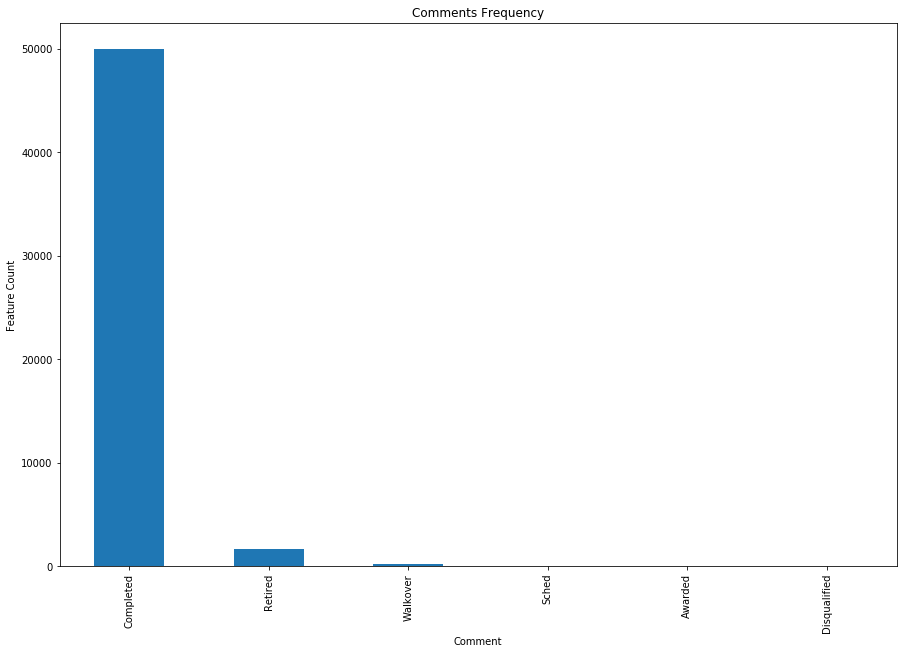

In [53]:
ax = dataframe['Comment'].value_counts().plot.bar(figsize=(15,10), title = 'Comments Frequency')

ax.set(xlabel = 'Comment', ylabel = 'Feature Count')

ax

# Possiamo prendere in considerazione solo Completed Retired e Walkover

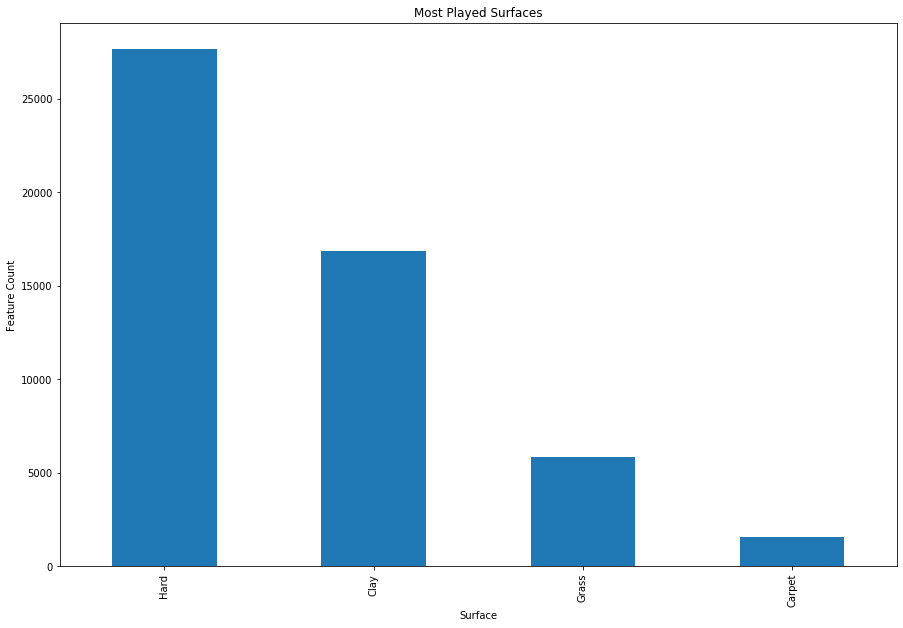

In [52]:
ax = dataframe['Surface'].value_counts().plot.bar(figsize=(15,10), title = 'Most Played Surfaces')

ax.set(xlabel = 'Surface', ylabel = 'Feature Count')

ax
# Possiamo prendere in considerazione tutti i valori

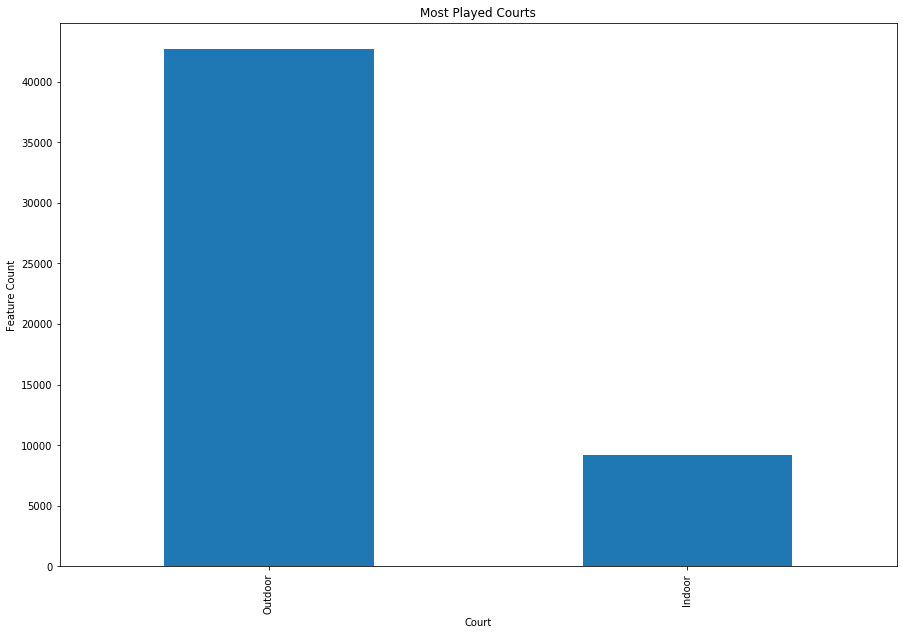

In [51]:
ax = dataframe['Court'].value_counts().plot.bar(figsize=(15,10), title = 'Most Played Courts')

ax.set(xlabel = 'Court', ylabel = 'Feature Count')

ax

# Possiamo prendere in considerazione tutti i valori

Le feature riguardanti le Series sono poche e facilmente gestibili

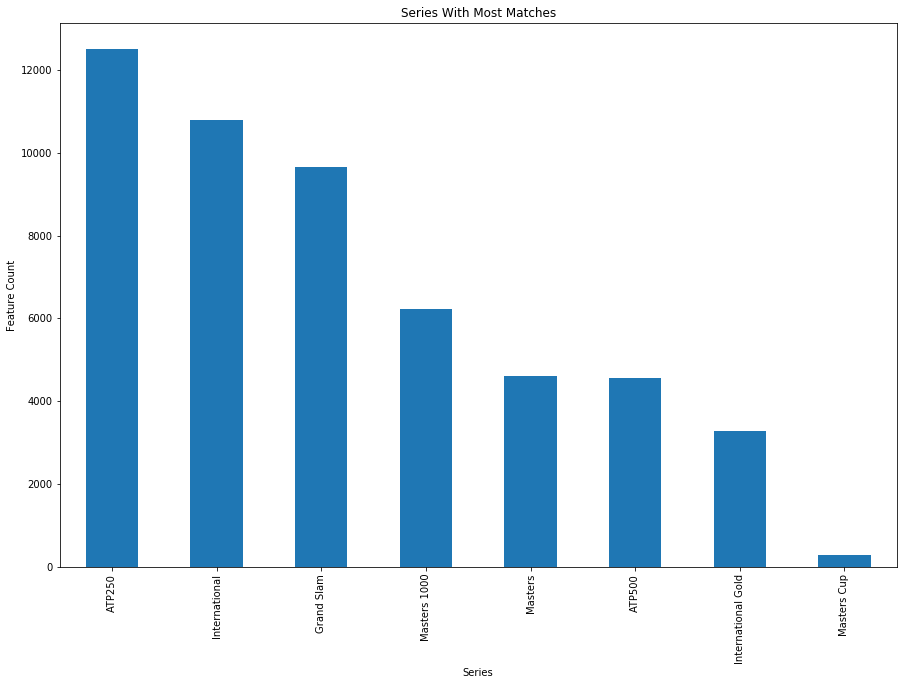

In [50]:
ax = dataframe['Series'].value_counts().plot.bar(figsize=(15,10), title = 'Series With Most Matches')

ax.set(xlabel = 'Series', ylabel = 'Feature Count')

ax

Le location sono molte, è possibile organizzarle in base al numero di Match giocati

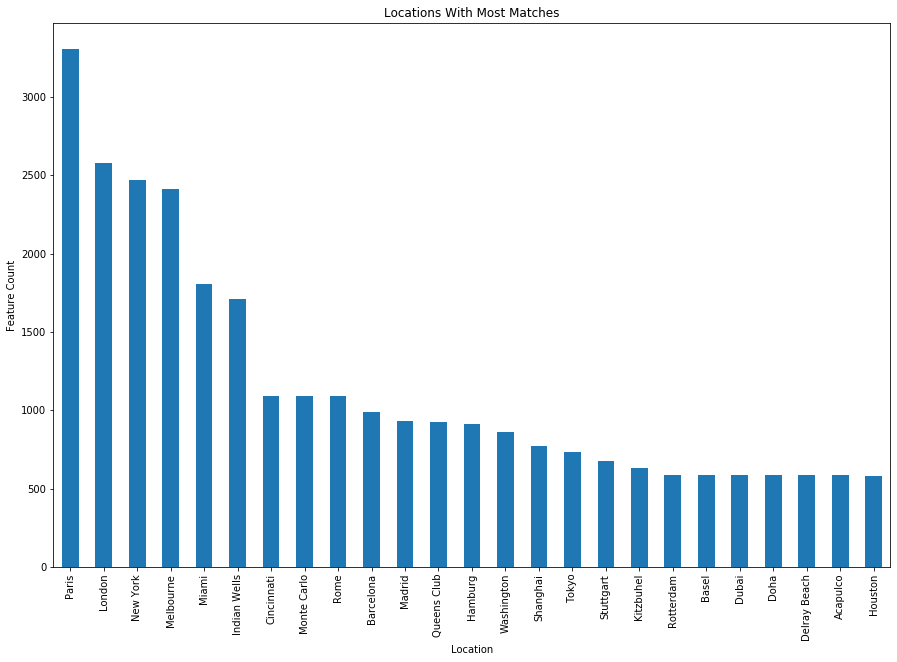

In [49]:
ax = dataframe['Location'].value_counts().head(25).plot.bar(figsize=(15,10), title = 'Locations With Most Matches')

ax.set(xlabel = 'Location', ylabel = 'Feature Count')

ax

E' forse possibile considerare l'importanza dei tornei in base al numero di match giocati, oppure in base al loro prestigio.

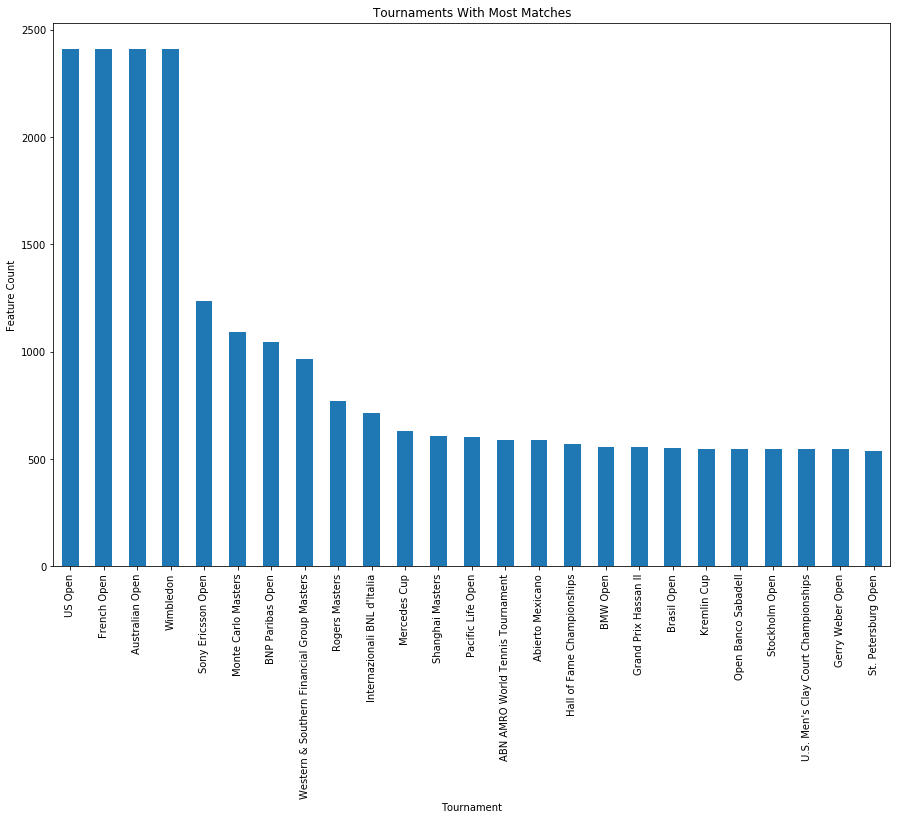

In [46]:
ax = dataframe['Tournament'].value_counts().head(25).plot.bar(figsize=(15,10), title = 'Tournaments With Most Matches')

ax.set(xlabel = 'Tournament', ylabel = 'Feature Count')

ax

Possiamo organizzare i giocatori in ordine di maggior differenza vittorie sconfitte come visibile dai successivi grafici

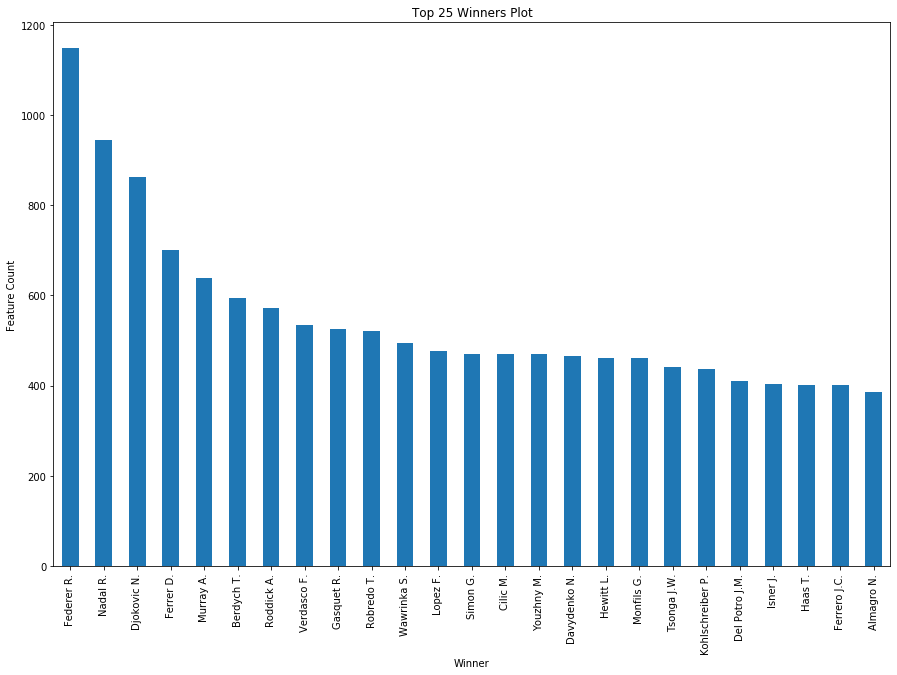

In [48]:
ax = dataframe['Winner'].value_counts().head(25).plot.bar(figsize=(15,10), title = 'Top 25 Winners Plot')

ax.set(xlabel = 'Winner', ylabel = 'Feature Count')

ax

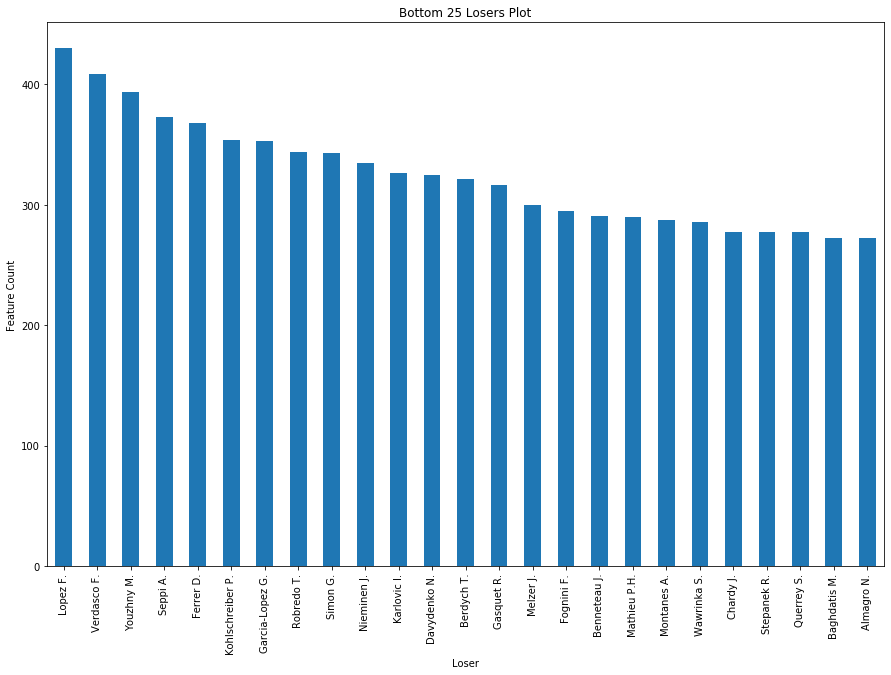

In [47]:
ax = dataframe['Loser'].value_counts().head(25).plot.bar(figsize=(15,10), title = 'Bottom 25 Losers Plot')

ax.set(xlabel = 'Loser', ylabel = 'Feature Count')

ax

In [38]:
dataframe.to_csv('./datasets/dataframe00.csv', index = False)